In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
vaccinations_df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')

vaccine_types_df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv')

vaccination_age_groups = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-age-group.csv')

In [5]:
vaccinations_df.head(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [6]:
vaccinations_df.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'daily_vaccinations_per_million', 'daily_people_vaccinated',
       'daily_people_vaccinated_per_hundred'],
      dtype='object')

In [7]:
eastafrica = ['Kenya', 'Uganda','Tanzania','Eriteria','South Sudan','Djibouti','Ethiopia','Somali']

<AxesSubplot:ylabel='location'>

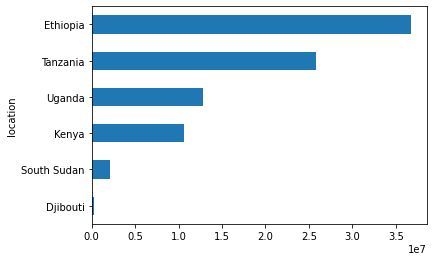

In [8]:
(vaccinations_df
 .query('location == @eastafrica')
#.groupby('location')['daily_vaccinations'].sum().sort_values().plot.barh()
#.groupby('location')['total_boosters'].sum().sort_values().plot.barh()
.groupby('location')['people_fully_vaccinated'].max().sort_values().plot.barh()
)

In [9]:
(vaccinations_df
 .query('location == "Kenya"')
 .people_fully_vaccinated.max()
)

10641225.0

In [10]:
(vaccinations_df
 .query('location == "Kenya"')
 .date.min()
)

'2021-03-04'

<AxesSubplot:>

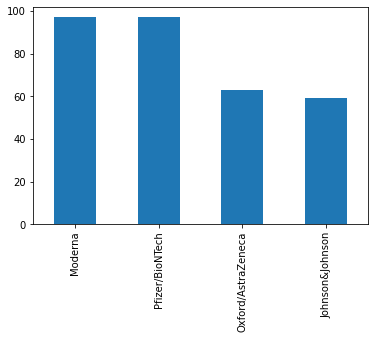

In [11]:
(vaccine_types_df
 .query('location == "Spain"')
 .vaccine.value_counts()
 .plot.bar()
)

In [12]:
vaccination_age_groups

,location,date,age_group,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_with_booster_per_hundred
0,Argentina,2020-01-01,100+,0.00,0.00,0.0
1,Argentina,2020-01-01,12-17,0.00,0.00,0.0
2,Argentina,2020-01-01,18-29,0.00,0.00,0.0
3,Argentina,2020-01-01,3-11,0.00,0.00,0.0
4,Argentina,2020-01-01,30-39,0.00,0.00,0.0
...,...,...,...,...,...,...
52625,Uruguay,2021-07-09,35-44,81.24,73.55,NaN
52626,Uruguay,2021-07-09,45-54,84.00,78.39,NaN
52627,Uruguay,2021-07-09,55-64,88.66,84.06,NaN
52628,Uruguay,2021-07-09,65-74,89.78,78.87,NaN


In [13]:
(vaccination_age_groups
 .groupby('age_group')['people_fully_vaccinated_per_hundred'].sum()
)

age_group
0-15          0.00
0-17      15396.88
0-19      18525.42
0-4          51.00
0-5           0.00
0-9         114.21
10-14     39262.03
10-19      3001.34
100+      46637.87
12-15     34345.97
12-17     32731.83
12-64     38849.95
15-17     75123.31
16-17      2706.00
16-19     40023.98
16-69         0.00
18-24    138469.75
18-29     46108.25
18-69        14.02
20-29     91976.52
25-34       901.64
25-49    147285.42
3-11      21892.13
30-39    157322.96
35-44      1205.54
40-49    168337.81
45-54      1753.78
5-11       6229.81
5-9        9344.54
50-54     10136.00
50-59    328060.47
55-59     11247.00
55-64      2955.28
60-64     11436.00
60-69    345511.72
65+       45887.46
65-69     11196.00
65-74      1936.82
70-74     11348.00
70-79    362244.84
75+        1320.51
75-79     11825.00
80+      243725.33
80-89    122123.66
90+       75260.19
90-99     41069.71
Name: people_fully_vaccinated_per_hundred, dtype: float64

In [14]:
vaccination_age_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52630 entries, 0 to 52629
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             52630 non-null  object 
 1   date                                 52630 non-null  object 
 2   age_group                            52630 non-null  object 
 3   people_vaccinated_per_hundred        52622 non-null  float64
 4   people_fully_vaccinated_per_hundred  52186 non-null  float64
 5   people_with_booster_per_hundred      44410 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.4+ MB
